# Modeling changes in intracellular pH

Basic assumptions - spherical yeast, intracellular pH is homogeneous (no organellar pH).

**GOAL:** Predict intracellular pH as a function of time and temperature; $pH_i(T, t)$.

Not considering: action of Vma1, changes in external pH (essentially infinite proton bath).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(font_scale=2, style="white")

(10000.0, 1000000.0)

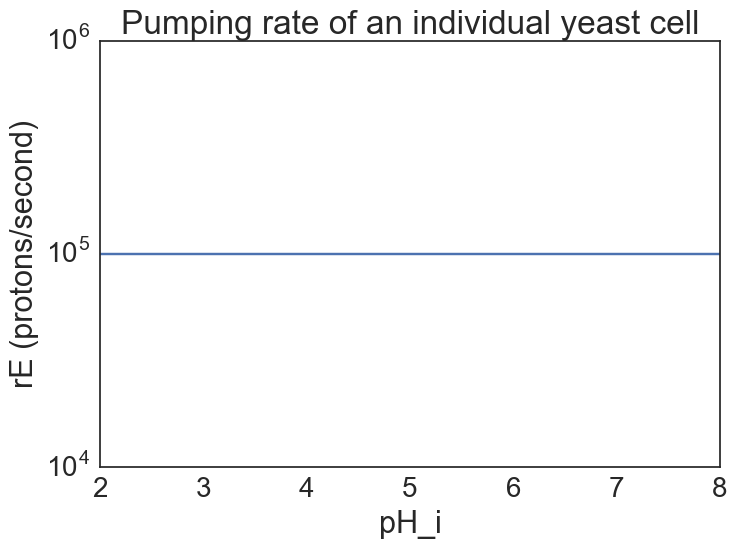

In [15]:
# First plot dependence of influx and efflux rates
# First pass assumption: pumping rate (efflux) is independent of internal pH. In reality we know that it can vary from 
# I've calculate the max pumping rate (of a single cell) to be 10^6 protons/second.

rE = 1e5
rE_vec = np.full(np.shape(pHi), rE)
pHi = [2,3,4,5,6,7,8]

plt.plot(pHi, np.full(np.shape(pHi), rE))
plt.xlabel("pH_i")
plt.ylabel("rE (protons/second)")
plt.title("Pumping rate of an individual yeast cell")
plt.yscale('log')
plt.ylim(1e4,1e6)

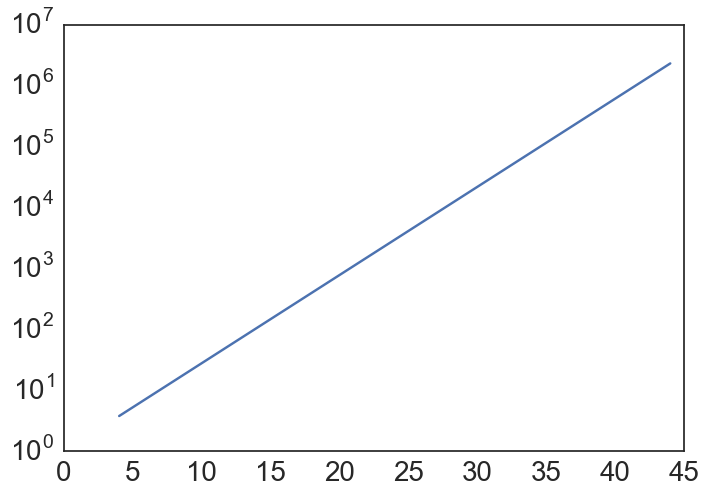

In [19]:
# For now, assume linear relationship between influx (permeability) and pumping rate

T = np.arange(4.,45.)
rI = np.exp(T/3)

plt.plot(T, rI)
plt.yscale('log')